# Target -> EDA, formulasikan masalah klasifikasi dari dataset (buat model ml) 

default prediction model for lending club, target_column -> loan_condition_cat (0 iku apik, 1 iku elek)

# Dataset Exploration

## Import Libraries

Import all libraries needed for this project.

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Load The Dataset

Load The Irish Dummy Bank dataset of Peer-to-Peer Lending transactions.

In [2]:
irish_bank_data = pd.read_csv('./dataset/loan_final313.csv')
irish_bank_data.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [3]:
irish_bank_data.drop(columns = 'id', inplace = True)
irish_bank_data.head()

,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,5000,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,2500,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,2400,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,10000,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,3000,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


## Identify Dataset Shape

Identify the shape of the dataset in the format of row and coloumn

In [4]:
irish_bank_data.shape

(887379, 29)

In [5]:
irish_bank_data.columns

Index(['year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

In [7]:
irish_bank_data.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [6]:
irish_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  887379 non-null  int64  
 1   issue_d               887379 non-null  object 
 2   final_d               887379 non-null  int64  
 3   emp_length_int        887379 non-null  float64
 4   home_ownership        887379 non-null  object 
 5   home_ownership_cat    887379 non-null  int64  
 6   income_category       887379 non-null  object 
 7   annual_inc            887379 non-null  int64  
 8   income_cat            887379 non-null  int64  
 9   loan_amount           887379 non-null  int64  
 10  term                  887379 non-null  object 
 11  term_cat              887379 non-null  int64  
 12  application_type      887379 non-null  object 
 13  application_type_cat  887379 non-null  int64  
 14  purpose               887379 non-null  object 
 15  

# Identify Missing Values

In [8]:
irish_bank_data.isna().values.any()

False

# Identify Duplicate Entries

In [11]:
irish_bank_data[irish_bank_data.duplicated(keep = False)]

,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region


In [12]:
irish_bank_data.duplicated().value_counts()

False    887379
dtype: int64

# Describe The Dataset

In [14]:
irish_bank_data.describe()

,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,887379.000000,8.873790e+05,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,2014.021761,1.047089e+06,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,1.261741,4.555149e+04,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,2007.000000,1.012008e+06,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,2013.000000,1.012016e+06,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,2014.000000,1.012016e+06,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,2015.000000,1.092015e+06,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,2015.000000,1.122015e+06,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


count -> jumlah data
mean -> rata2
std -> standar deviasi
min -> paling cilik dll

# Correlation Matrix

In [15]:
irish_bank_data.corr()

,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
year,1.000000,-0.184786,0.048980,0.019558,0.035911,0.037992,0.103722,0.081026,0.018610,-0.036398,-0.049023,-0.165122,-0.063632,0.016914,0.078530,-0.464010,-0.443454,-0.100694,0.075157
final_d,-0.184786,1.000000,-0.008798,-0.003452,-0.013948,-0.015349,-0.023783,-0.027823,-0.009521,0.016936,0.041204,0.178373,0.049275,0.023021,-0.017203,0.180982,0.199173,0.041700,-0.008882
emp_length_int,0.048980,-0.008798,1.000000,0.204312,0.063382,0.039226,0.103898,0.067528,0.000525,0.019169,0.007701,-0.015821,0.008943,0.004301,0.020660,0.049354,0.036753,0.004163,0.088634
home_ownership_cat,0.019558,-0.003452,0.204312,1.000000,0.154832,0.156441,0.196269,0.109770,0.009016,0.022575,-0.050201,-0.037253,-0.064271,-0.062029,0.001117,0.105861,0.095706,0.003483,0.163354
annual_inc,0.035911,-0.013948,0.063382,0.154832,1.000000,0.630750,0.332697,0.058360,-0.006071,0.004787,-0.063125,-0.034142,-0.072785,-0.064426,-0.087409,0.160879,0.149993,0.007717,0.326181
income_cat,0.037992,-0.015349,0.039226,0.156441,0.630750,1.000000,0.359688,0.042310,-0.005893,0.002355,-0.066881,-0.037397,-0.080198,-0.070596,-0.094228,0.172401,0.162372,0.005564,0.355886
loan_amount,0.103722,-0.023783,0.103898,0.196269,0.332697,0.359688,1.000000,0.411717,0.013192,-0.037038,0.112867,0.003512,0.145023,0.150873,0.020675,0.474626,0.390473,0.073150,0.944977
term_cat,0.081026,-0.027823,0.067528,0.109770,0.058360,0.042310,0.411717,1.000000,0.012165,0.029277,0.351261,0.039591,0.428058,0.442701,0.051077,0.083078,-0.025831,0.057290,0.144984
application_type_cat,0.018610,-0.009521,0.000525,0.009016,-0.006071,-0.005893,0.013192,0.012165,1.000000,-0.000373,0.006674,-0.005997,0.010545,0.013671,0.074453,-0.021223,-0.019599,-0.002690,0.010953
purpose_cat,-0.036398,0.016936,0.019169,0.022575,0.004787,0.002355,-0.037038,0.029277,-0.000373,1.000000,0.135256,0.031197,0.158082,0.156398,-0.008617,0.007385,-0.001591,0.013751,-0.030693


<AxesSubplot:>

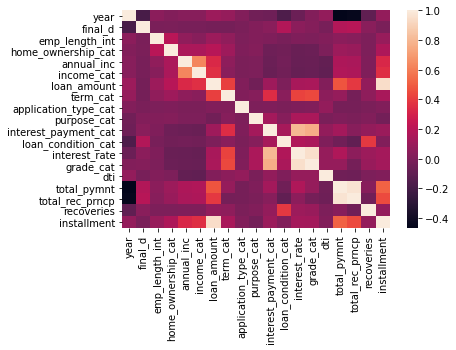

In [17]:
sns.heatmap(data = irish_bank_data.corr())

In [ ]:
irish

### Import module

iki teks

In [ ]:
train = pd.read_csv("loan_final313.csv")

In [ ]:
train.dtypes

In [ ]:
train.shape

In [ ]:
train.describe()

In [ ]:
train['final_d']= pd.to_datetime(train['final_d'])

In [ ]:
train['loan_amount'].value_counts()

In [ ]:
train['id'].unique()

## Filter

In [ ]:
train[(train['income_cat'] == "Low")]

## Finding Null Values

In [ ]:
train.apply(lambda x: sum(x.isnull()),axis=0)

## Data Distribution

In [ ]:
train['installment'].hist(bins=25) #skewed iki nang kiri

In [ ]:
print(train.boxplot(column='interest_rate'))

In [ ]:
train.boxplot(column=’disbursed_amount’, by = ‘Employment.Type’)

In [ ]:
sns.boxplot(x=train['asset_cost'])

## Count Plot

In [ ]:
sns.countplot(train.loan_condition_cat)

In [ ]:
sns.countplot(train.home_ownership)

# Classification Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features selection

In [18]:
X = irish_bank_data.drop(columns = "loan_amount")
X.head()

,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,term,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,36 months,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,60 months,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,36 months,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,36 months,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,60 months,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [19]:
y = irish_bank_data['loan_amount']
y.head()

0     5000
1     2500
2     2400
3    10000
4     3000
Name: loan_amount, dtype: int64

# Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print("training dataset")
print(X_train.shape)
print(y_train.shape)
print()
print("testing dataset")
print(X_test.shape)
print(y_test.shape)

# K Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

In [ ]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

In [ ]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

In [ ]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

# Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

# Accuracy comparision for various models.

In [ ]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()